# Used Car Price Prediction
**_Importing The Required Libraries & Packages_**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

**_Changing The Default Working Directory & Path and Reading The Dataset Using Pandas Command_**

In [4]:
df = pd.read_csv(r"C:\Users\Farhan\Downloads\dataset.csv")

In [5]:
df.shape

(6019, 14)

## _Data Cleaning_
**_Viewing the dataset for identifying the unwanted columns_**

In [7]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**_Dropping the `Unnamed: 0`,and `New_Price` column since it is not much important for the prediction_**

In [9]:
df.drop(['Unnamed: 0','New_Price'],axis=1,inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


**_There are several cars in the dataset,some of them with a count higher than 1.sometimes the resale value of a car also depends on manufacturer of the car. So, here extracting the manufacturer name from this column and adding it to the dataset_**

In [11]:
df['Name'].value_counts()

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1876, dtype: int64

In [12]:
manufacturer = df['Name'].str.split(' ').str.slice(0, 2)
df['Manufacturer'] = manufacturer.str.join(' ')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi A4


**_The `Year` column from the datasethas no significance on its own so calculating  the years of cars used till now and adding it to the dataset._**

In [14]:
curr_time = datetime.datetime.now()
df['Year Used']=df['Year'].apply(lambda x:curr_time.year-x)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Year Used
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti Ertiga,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi A4,11


**_dropping the `Name` and `Year` columns since the needed data is extracted from it and added to the dataset in seperate columns as `Manufacturer` and `Year Used`_**

In [16]:
df.drop(['Name','Year'],axis=1,inplace=True)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Year Used
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon,14
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta,9
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz,13
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti Ertiga,12
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi A4,11


**_Checking the Null values of all the Columns in the dataset_**

In [18]:
df.isnull().sum()

Location              0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Manufacturer          0
Year Used             0
dtype: int64

**_The `Mileage` columns defines the mileage of the car which affects the price of the car during the sales. So that Extracting the numerical values from the `Mileage` column and since it has missing values,filling out the missing values with the mean & modifying the column with the values_** 

In [20]:
mileage = df['Mileage'].str.split(' ',expand=True)
df['Mileage'] = pd.to_numeric(mileage[0],errors='coerce')
df['Mileage'].fillna(df['Mileage'].astype('float').mean(),inplace=True)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Year Used
0,Mumbai,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon,14
1,Pune,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta,9
2,Chennai,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz,13
3,Chennai,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,Maruti Ertiga,12
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74,Audi A4,11


**_The `Engine` columns has the CC of the car which affects the price of the car during the sales. So that removing CC and Extracting the numerical values from the `Engine` column and since it has missing values,filling out the missing values with the mean  modifying the column with the values_** 

In [22]:
engine = df['Engine'].str.split(' ',expand=True)
df['Engine']=pd.to_numeric(engine[0],errors='coerce')
df['Engine'].fillna(df['Engine'].astype('float').mean(),inplace=True)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Year Used
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75,Maruti Wagon,14
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50,Hyundai Creta,9
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50,Honda Jazz,13
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00,Maruti Ertiga,12
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74,Audi A4,11


**_The `Power` columns has the bhp of the car which affects the price of the car during the sales. So that removing bhp and Extracting the numerical values from the `Power` column and since it has missing values,filling out the missing values with the mean  modifying the column with the values_** 

In [24]:
power = df['Power'].str.split(' ',expand=True)
df['Power']=pd.to_numeric(power[0],errors='coerce')
df['Power'].fillna(df['Power'].astype('float').mean(),inplace=True)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Year Used
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti Wagon,14
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai Creta,9
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda Jazz,13
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti Ertiga,12
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi A4,11


**_since the `Seats` columns has some missing values filling out the missing values with the mean value of the same column_**

In [26]:
df['Seats'].fillna(df['Seats'].astype('float').mean(),inplace=True)

**_After Filling out the missing value with the appropriate values,checking for the null value in the dataset._**

In [28]:
df.isnull().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Manufacturer         0
Year Used            0
dtype: int64

## _Data Visualization_
**_Plotting the Bar Graph with count of cars based on the `Manufacturer` and confirm that there are no null values and identify all the unique values from the `Manufacturer` and saving the png file_**

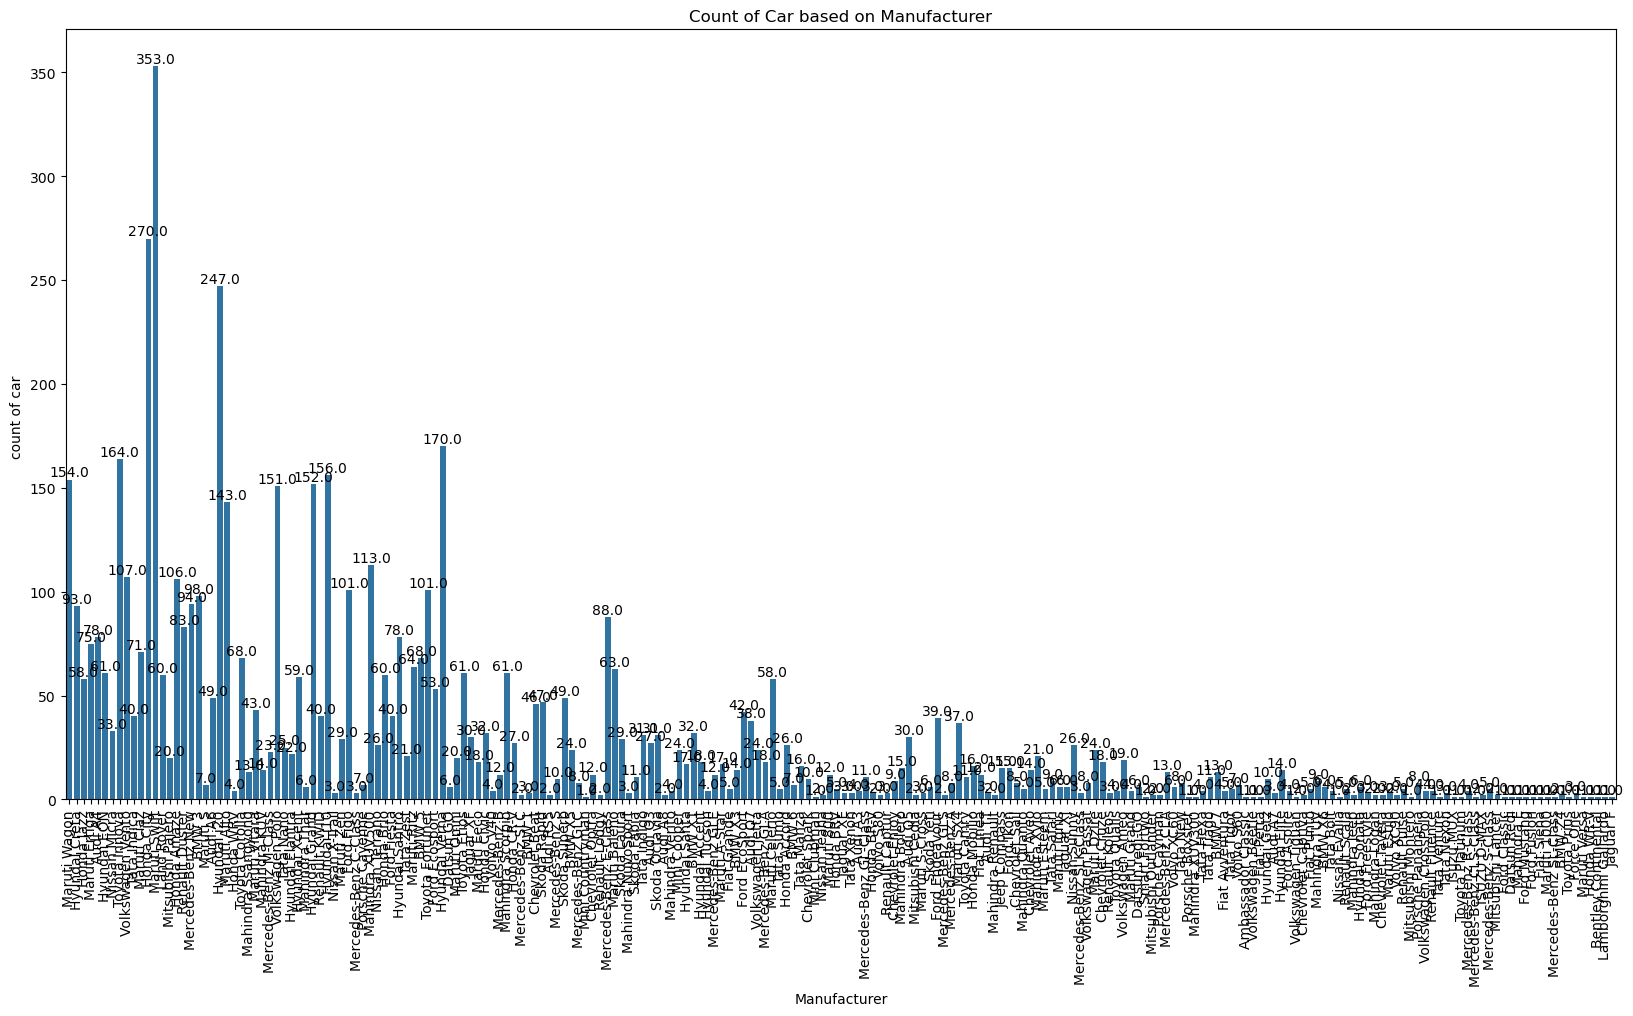

In [30]:
plt.rcParams['figure.figsize']=(20,10)
plot = sns.countplot(x='Manufacturer',data = df)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Count of Car based on Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('count of car ')
plt.savefig('Count of Car.png')
plt.show()

In [31]:
# Count occurrences of each manufacturer
manufacturer_counts = df['Manufacturer'].value_counts()

# Filter manufacturers with counts greater than 5
common_manufacturers = manufacturer_counts[manufacturer_counts >=5].index

# Keep only the rows where the Manufacturer is in the common manufacturers
df = df[df['Manufacturer'].isin(common_manufacturers)]


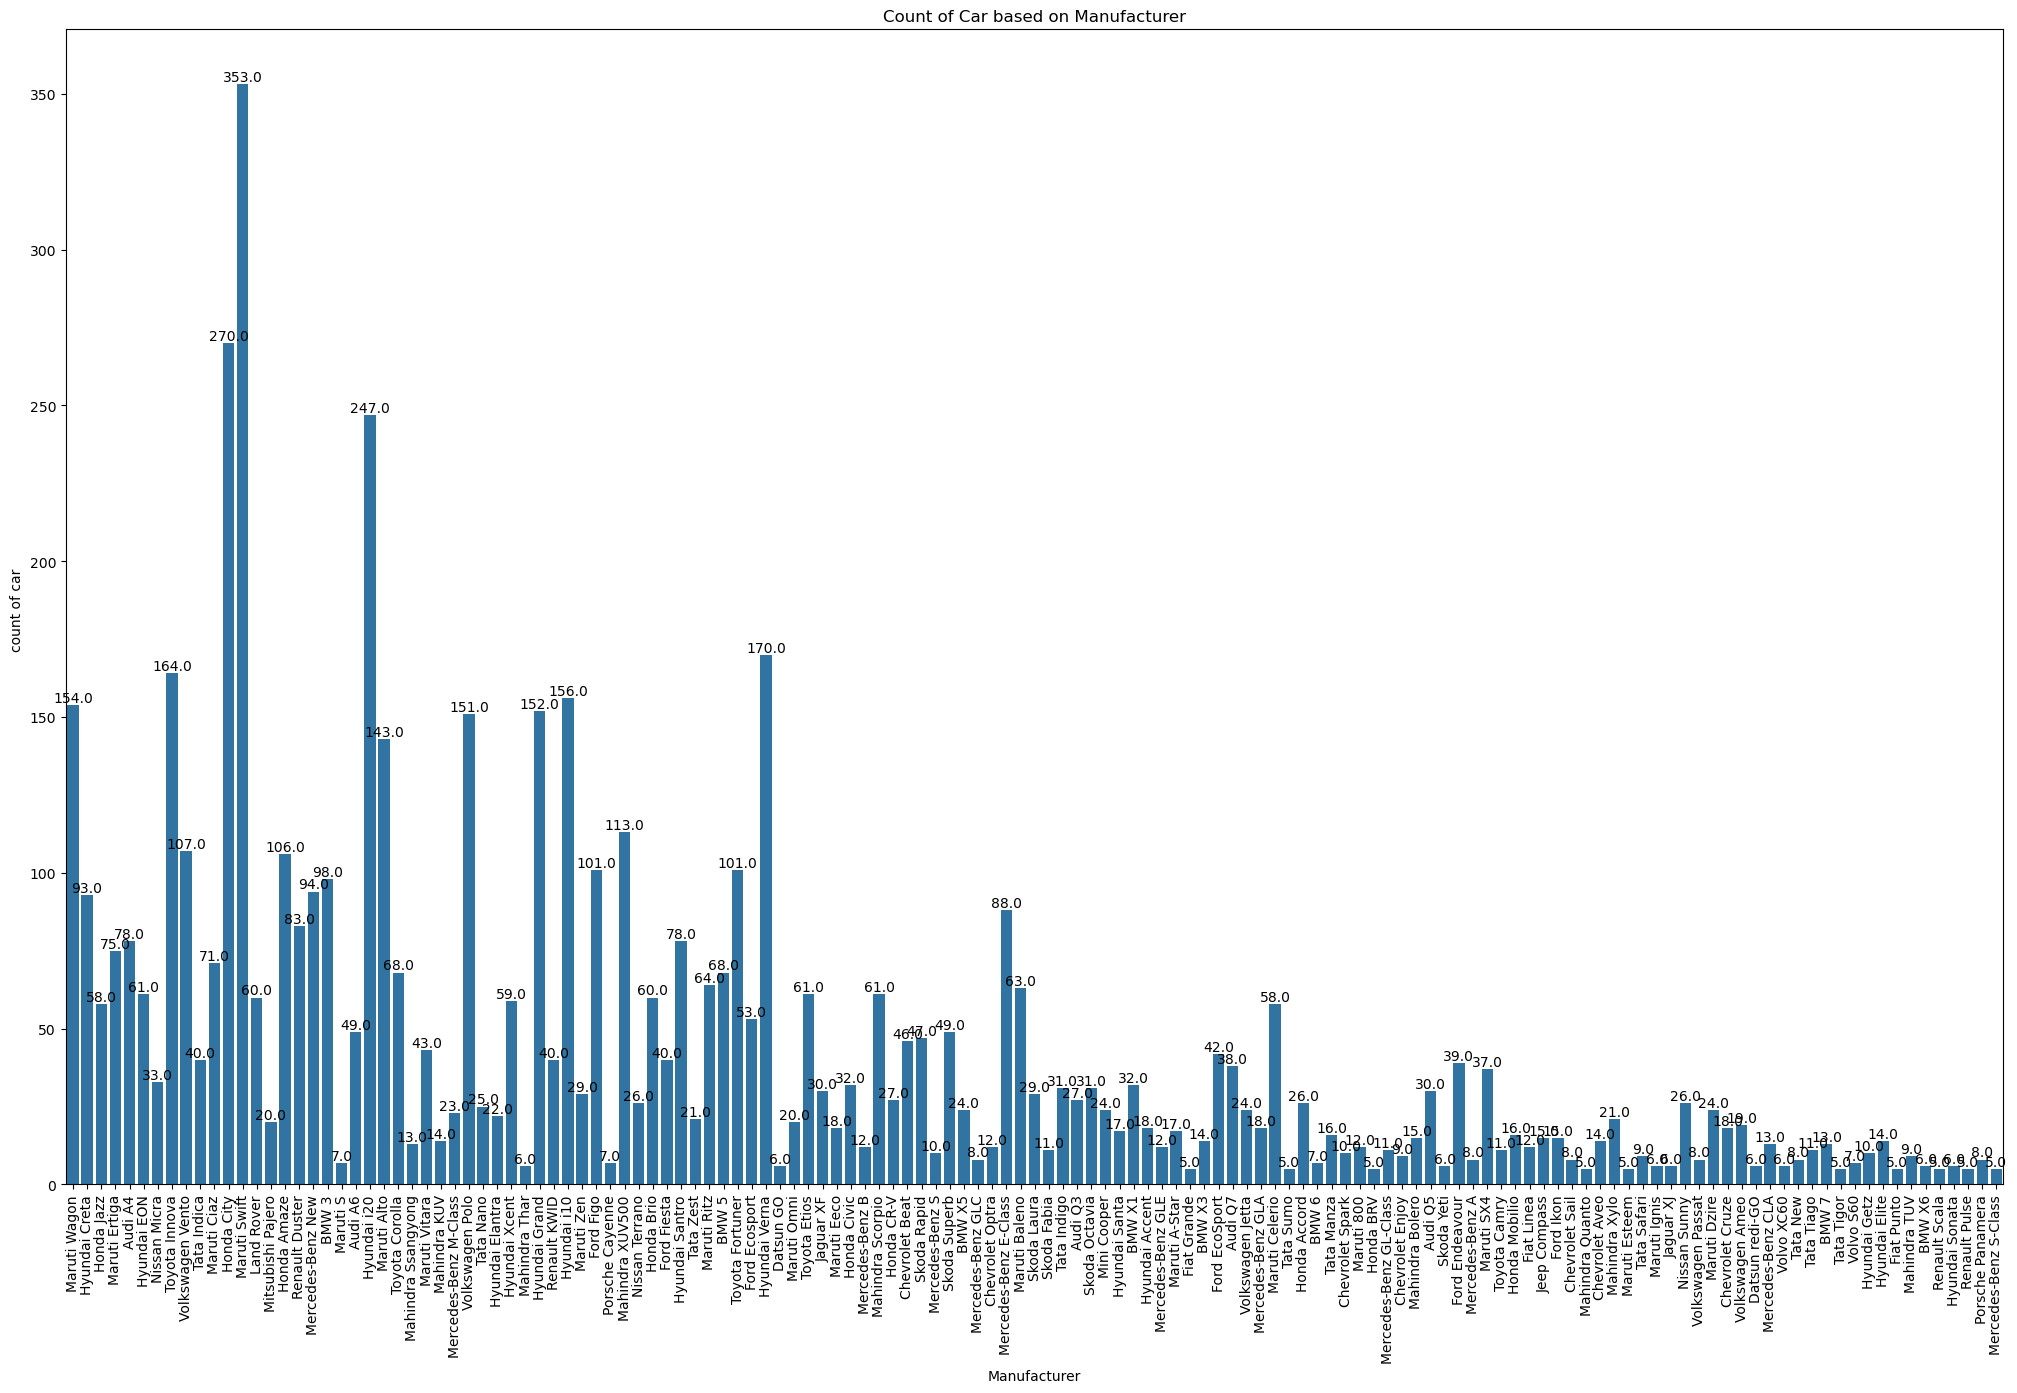

In [32]:
plt.rcParams['figure.figsize']=(25,15)
plot = sns.countplot(x='Manufacturer',data = df)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Count of Car based on Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('count of car ')
plt.savefig('Count of Car.png')
plt.show()

**_Creating the dummy columns for all the categorical columns such as Manufacturer, Fuel_Type, Transmission, Owner_Type,Location in the training independent dataset and getting the dimensions of the training independent dataset for cross-check_**


In [34]:
df=pd.get_dummies(df,columns=['Manufacturer','Fuel_Type','Transmission','Owner_Type','Location'],drop_first=True)


**_Splitting the dependent and independent variable into training and test dataset using train test split._**

In [36]:
x = df.drop(['Price'],axis=1)
y = df['Price']

In [37]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

**_Now after processing,the dimensions of the column of both training and test independent data are same._**

In [39]:
print('X_train',x_train.shape)
print('X_test',x_test.shape)

X_train (4676, 159)
X_test (1169, 159)


**_Standardizing the independent variable of the dataset_**

In [41]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor
from math import sqrt

## _Model Fitting_
**_Defining the Function for the ML algorithms and Predicting the Dependent Variable by fitting the given model and create the pickle file of the model with the given Algo_name. Further getting the Algorithm Name,  R2 Score in percentage format,mean absolute error ,mean squared error and rooted mean squared error between the predicted values and dependent test dataset._**

In [44]:
def Fitmodel(algo_name,algorithm):
    model=algorithm
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(' Algorithm Name:',algo_name)
    print('\n R2 Score:{}%',(100*r2_score(y_test,y_pred)))
    print('\n Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
    print('\n Mean Squared Error:',mean_squared_error(y_test,y_pred))
    print('\n Root Mean Squared Error:',sqrt(mean_squared_error(y_test,y_pred)))

**_Running the function with empty parameters since the Linear Regression model doesn't need any special parameters and fitting the Linear Regression Algorithm and getting the Algorithm Name, R2 Score in percentage format,mean absolute error ,mean squared error and rooted mean squared error between the predicted values and dependent test dataset and also the pickle file with the name Linear Regression._**

In [46]:
Fitmodel('Linear Regression',LinearRegression())

 Algorithm Name: Linear Regression

 R2 Score:{}% 84.52479298430836

 Mean Absolute Error: 2.310588819222677

 Mean Squared Error: 17.108272323944103

 Root Mean Squared Error: 4.136214733780647


**_Running the function with empty parameters since the Lasso model doesn't need any special parameters and fitting the Linear Regression Algorithm and getting the Algorithm Name, R2 Score in percentage format,mean absolute error ,mean squared error and rooted mean squared error between the predicted values and dependent test dataset and also the pickle file with the name Lasso._**

In [48]:
Fitmodel('Lasso',Lasso())

 Algorithm Name: Lasso

 R2 Score:{}% 69.69235428043206

 Mean Absolute Error: 3.3411882594268767

 Mean Squared Error: 33.50594637876081

 Root Mean Squared Error: 5.788432117487499


**_Running the function with empty parameters since the Ridge model doesn't need any special parameters and fitting the Linear Regression Algorithm and getting the Algorithm Name, R2 Score in percentage format,mean absolute error ,mean squared error and rooted mean squared error between the predicted values and dependent test dataset and also the pickle file with the name Ridge._**

In [50]:
Fitmodel('Ridge',Ridge())

 Algorithm Name: Ridge

 R2 Score:{}% 84.52397321208807

 Mean Absolute Error: 2.3103192093819453

 Mean Squared Error: 17.10917860496342

 Root Mean Squared Error: 4.1363242867264916


**_Running the function with empty parameters since the RandomForestRegressor model doesn't need any special parameters and fitting the Linear Regression Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, R2 Score in percentage format,mean absolute error ,mean squared error and rooted mean squared error between the predicted values and dependent test dataset and also the pickle file with the name RandomForestRegressor._**

In [52]:
Fitmodel('Random Forest',RandomForestRegressor())

 Algorithm Name: Random Forest

 R2 Score:{}% 93.51546094678804

 Mean Absolute Error: 1.2606029746629188

 Mean Squared Error: 7.168838510858689

 Root Mean Squared Error: 2.677468675980858


In [53]:
def predict(algorithm,x):
    model=algorithm
    model.fit(x_train,y_train)
    y_pred=model.predict(x)
    print(y_pred)

In [54]:
predict(RandomForestRegressor(),[x_test[1]])

[6.3127]


In [55]:
def custom_ensemble(x_train, y_train, x_test):
    models = [
        RandomForestRegressor(),
        Ridge(),
        LinearRegression()
    ]
    # List to store predictions from each model
    prices = []
    # Train each model and make predictions
    for model in models:
        model.fit(x_train, y_train)  # Fit the model
        cur_price = model.predict(x_test)  # Predict on test data
        prices.append(cur_price)  # Store the predictions
    # Calculate the mean of predictions
    ensemble_price = np.mean(prices, axis=0)
    print(ensemble_price)

In [56]:
custom_ensemble(x_train,y_train,[x_test[1]])

[6.49991678]


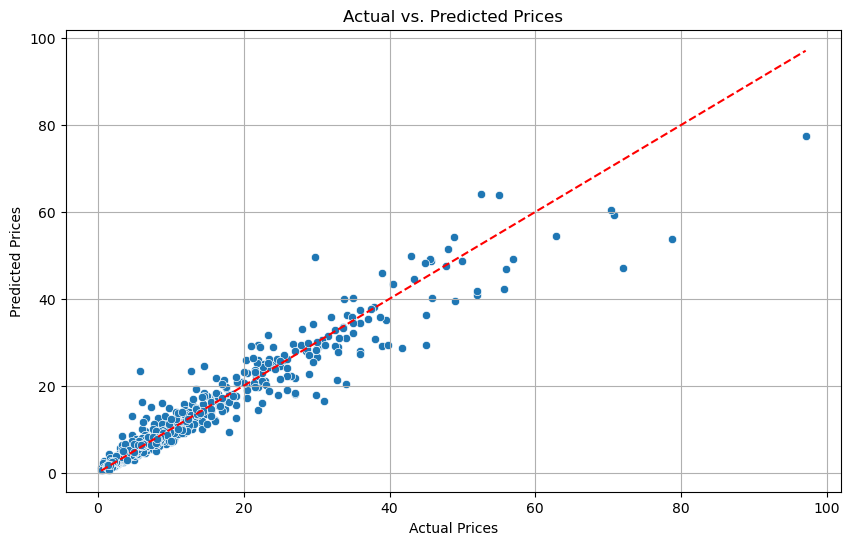

In [57]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
# Create a new DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': predictions
}).reset_index(drop=True)
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual', y='predicted', data=results_df)
plt.plot([results_df['actual'].min(), results_df['actual'].max()], 
         [results_df['actual'].min(), results_df['actual'].max()], 
         color='red', linestyle='--')  # Diagonal line for perfect predictions
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()